# Data Preparation

In [8]:
suppressMessages(library(CausalImpact))
suppressMessages(library(dplyr))

In [9]:
df <- read.csv("dataset//20180916-bukalapak-campaign.csv")

In [10]:
head(df)

Month,Tokopedia,observed,residual,flag
2011-01-01,1,4,NA,BEFORE_CAMPAIGN
2011-02-01,2,4,NA,BEFORE_CAMPAIGN
2011-03-01,2,4,NA,BEFORE_CAMPAIGN
2011-04-01,2,5,NA,BEFORE_CAMPAIGN
2011-05-01,2,4,NA,BEFORE_CAMPAIGN
2011-06-01,2,4,NA,BEFORE_CAMPAIGN


In [11]:
# df[df$flag == 'AFTER_FIRST_CAMPAIGN', ] 

# Analysis

## Causal Impact
### First campaign

In [12]:
pre.period <- as.Date(c('2011-01-01','2016-12-01'))
post.period <- as.Date(c('2017-01-01','2018-09-01'))

In [13]:
time.points <- as.Date(df$Month)
data <- zoo(cbind(df$observed, df$Tokopedia), time.points)
# data <- zoo(cbind(df$observed), time.points)

In [14]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

Warning message:
“Removed 93 rows containing missing values (geom_path).”Warning message:
“Removed 186 rows containing missing values (geom_path).”

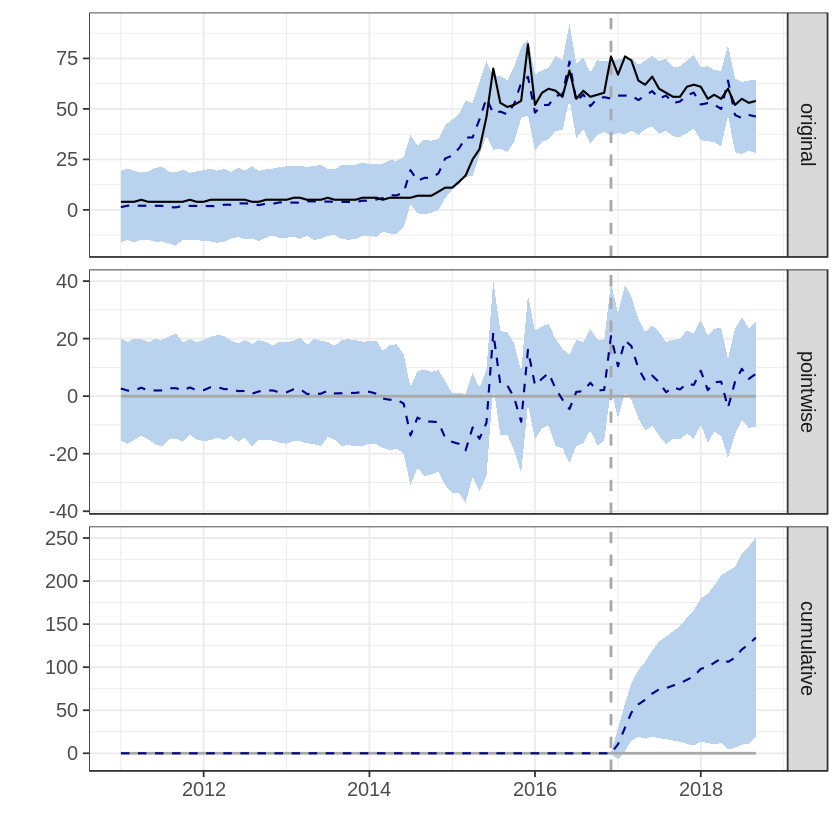

In [15]:
plot(ci)

In [16]:
summary(ci)

Posterior inference {CausalImpact}

                         Average       Cumulative  
Actual                   60            1264        
Prediction (s.d.)        54 (2,8)      1130 (59,7) 
95% CI                   [48, 59]      [1013, 1245]
                                                   
Absolute effect (s.d.)   6,4 (2,8)     134,4 (59,7)
95% CI                   [0,9, 12]     [18,9, 251] 
                                                   
Relative effect (s.d.)   12% (5,3%)    12% (5,3%)  
95% CI                   [1,7%, 22%]   [1,7%, 22%] 

Posterior tail-area probability p:   0,01404
Posterior prob. of a causal effect:  98,596%

For more details, type: summary(impact, "report")



In [17]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 60,19. By contrast, in the absence of an intervention, we would have expected an average response of 53,79. The 95% interval of this counterfactual prediction is [48,26, 59,29]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 6,40 with a 95% interval of [0,90, 11,93]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 1,26K. By contrast, had the intervention not taken place, we would have expected a sum of 1,13K. The 95% interval of this prediction is [1,01K, 1,25K].

The above results are given in terms of absolute numbers. In relative terms, the response variable showe

### Second campaign

In [18]:
pre.period <- as.Date(c('2011-01-01','2017-06-01'))
post.period <- as.Date(c('2017-07-01','2018-09-01'))

In [19]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

Warning message:
“Removed 93 rows containing missing values (geom_path).”Warning message:
“Removed 186 rows containing missing values (geom_path).”

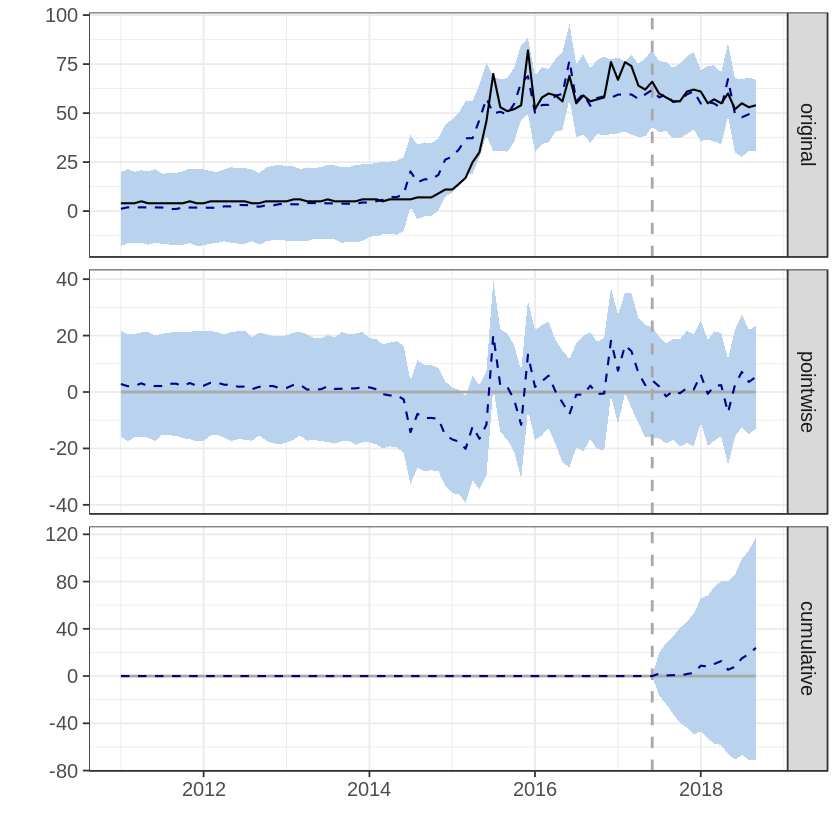

In [20]:
plot(ci)

In [21]:
summary(ci)

Posterior inference {CausalImpact}

                         Average        Cumulative    
Actual                   57             855           
Prediction (s.d.)        55 (3,3)       831 (48,8)    
95% CI                   [49, 62]       [738, 926]    
                                                      
Absolute effect (s.d.)   1,6 (3,3)      23,9 (48,8)   
95% CI                   [-4,7, 7,8]    [-70,8, 117,3]
                                                      
Relative effect (s.d.)   2,9% (5,9%)    2,9% (5,9%)   
95% CI                   [-8,5%, 14%]   [-8,5%, 14%]  

Posterior tail-area probability p:   0,31194
Posterior prob. of a causal effect:  69%

For more details, type: summary(impact, "report")



In [22]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 57,00. In the absence of an intervention, we would have expected an average response of 55,40. The 95% interval of this counterfactual prediction is [49,18, 61,72]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 1,60 with a 95% interval of [-4,72, 7,82]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 855,00. Had the intervention not taken place, we would have expected a sum of 831,06. The 95% interval of this prediction is [737,69, 925,83].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of +3%. 